# Collaboration and Competition

---
1. Change sigma of OUNoise from 0.2 to 0.8.
2. Replace random experience replay with prioritized experience replay (PER).

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### Identical and Complement Fields in Observation Spaces

In [6]:
for index, s in enumerate(states):
    print('Observation of agent {}:\n{}\n'.format(index, s))

print('Identical fields:\n{}\n{}\n'.format(states[0][17],
                                        states[0][21]))

print('Complement fields:\n{}\n{}\n'.format(states[0][20],
                                     states[1][20]))

Observation of agent 0:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]

Observation of agent 1:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]

Identical fields:
-1.5
6.0

Complement fields:
6.83172082901001
-6.83172082901001



### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score:-0.00100	Execution Time:0:00:21.839913
Episode 200	Average Score:-0.00300	Execution Time:0:00:21.955158
Episode 300	Average Score:-0.00600	Execution Time:0:00:21.890055
Episode 400	Average Score:0.01100	Execution Time:0:00:25.189785
Episode 500	Average Score:0.01200	Execution Time:0:00:25.450907
Episode 600	Average Score:0.01500	Execution Time:0:00:26.900425
Episode 700	Average Score:0.00990	Execution Time:0:00:25.171561
Episode 800	Average Score:0.01400	Execution Time:0:00:25.861624
Episode 900	Average Score:0.01300	Execution Time:0:00:26.493302
Episode 1000	Average Score:0.02500	Execution Time:0:00:29.545469
Episode 1100	Average Score:0.01400	Execution Time:0:00:26.015193
Episode 1200	Average Score:0.01600	Execution Time:0:00:26.949765
Episode 1300	Average Score:0.01700	Execution Time:0:00:26.723009
Episode 1400	Average Score:0.01800	Execution Time:0:00:27.585444
Episode 

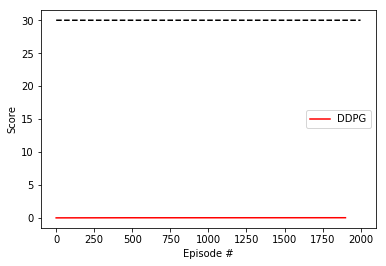

In [14]:
%load_ext autoreload
%autoreload 2

from utils.workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import numpy as np
from datetime import datetime
from utils import utils
from unity_env_decorator import UnityEnvDecorator
from agents.ddpg_agent_version_2 import DDPGAgentVersion2
from agents.agent_group import AgentGroup
from utils.utils import ScoreParcels

import pdb 

version='DDPG_version_3'
dir_logs='./logs/'
dir_checkpoints='./checkpoints/'

def ddpg(envDecorator, agentGroup, n_episode=2000, max_episode_length=2000, 
         print_every=100, size_window=100, baseline_score=0.5, save_best=True):
         

    max_score = 0.0
    scores_deque = deque(maxlen=size_window)
    scores = []
    
    
    # Declare time stamp for total execution time
    start_time_total = datetime.now()
    # Declare time stamp for execution time within 'print_every' episodes.
    start_time_window = datetime.now()
    
    
    for i_episode in range(1, n_episode+1):
        states = envDecorator.reset()
        agentGroup.reset()
        score = np.zeros(envDecorator.num_agents)
        
        for i_step in range(max_episode_length):
            # actions[0] = actions of agent_0.
            # actions[1]= actions of agent_1
            actions = agentGroup.act(states, add_noise=True)

#             pdb.set_trace()
            
            # next_states[0] = next_states of agent_0
            # next_states[1] = next_states of agent_1
            next_states, rewards, dones, _ = envDecorator.step(actions)

            agentGroup.step(states, actions, rewards, next_states, dones)
            
            score += rewards
            states = next_states
            
            if np.any(dones):
                break
                
        score_sum = np.sum(score)
        scores.append(score_sum)
        scores_deque.append(score_sum)
             
        print('\rEpisode {}\tReward:{:}\tStep:{}\tTime:{}'.format(i_episode,
                                                             score,
                                                              i_step+1,
                                                             datetime.now() - start_time_total),
                                                             end='')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score:{:.4f}\tExecution Time:{}'.format(i_episode,
                                                                 np.mean(scores_deque),
                                                                 datetime.now() - start_time_window))
                                                                 
            start_time_window = datetime.now()

        # save the best model
        if save_best is True:
            if (score_sum > baseline_score) and (max_score < score_sum):
                utils.save(agentGroup.model_dict(), dir_checkpoints, version)
                max_score = score_sum
            
           
    print('Average Score: {:.4f}\tTotal Time={}'.format(np.mean(scores_deque),
                                                        datetime.now() - start_time_total))
    
    return scores
        
                
with active_session():
    
    # Decorator of unity environmet
    envDecorator = UnityEnvDecorator(env)

    # define common parameters
    base_params = {'state_size': 24, 
                    'action_size': 2,
                    'random_seed': 0,
                    'lr_actor': 1e-3, 
                    'lr_critic': 1e-3,
                    'fc1_units': 128, 
                    'fc2_units': 128,
                    'buffer_size': int(1e6),
                    'learn_period': 20, 
                    'learn_sampling_num': 10,
                    'max_norm': 0.5,
                    'exploration_sigma': 0.8}
                    
    agent0 = DDPGAgentVersion2(**base_params, name='0')
    agent1 = DDPGAgentVersion2(**base_params, name='1')
                        
    # Composite design pattern
    agentGroup = AgentGroup([agent0, agent1])
    
    scores = ddpg(envDecorator, agentGroup, n_episode=2000, 
                    max_episode_length=20000, print_every=100)
    
    utils.save_logs(scores, dir_logs, version)
    
    path_score = utils.log_path_name(dir_logs, version)
    score_parcels = [ScoreParcels('DDPG', path_score, 'r')]
    utils.plot_scores(score_parcels, size_window=100)

    # save models in the agent. (Agent needs to return dict with model-name pair)
    utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score:-0.0070	Execution Time:0:00:21.378989
Episode 200	Average Score:-0.0090	Execution Time:0:00:21.076151
Episode 300	Average Score:-0.0040	Execution Time:0:00:22.545521
Episode 400	Average Score:-0.0100	Execution Time:0:00:20.239474
Episode 500	Average Score:-0.0100	Execution Time:0:00:21.223421
Episode 600	Average Score:-0.0070	Execution Time:0:00:20.980654
Episode 700	Average Score:-0.0100	Execution Time:0:00:20.750805
Episode 800	Average Score:-0.0100	Execution Time:0:00:20.110369
Episode 900	Average Score:-0.0100	Execution Time:0:00:20.865397
Episode 1000	Average Score:-0.0100	Execution Time:0:00:20.361052
Average Score: -0.0100	Total Time=0:03:29.532804


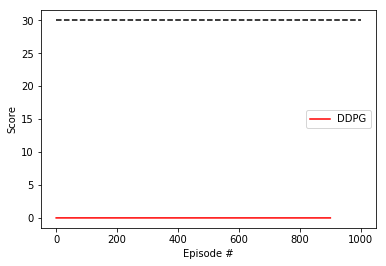

In [16]:
%load_ext autoreload
%autoreload 2

from utils.workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import numpy as np
from datetime import datetime
from utils import utils
from unity_env_decorator import UnityEnvDecorator
from agents.ddpg_agent_version_2 import DDPGAgentVersion2
from agents.agent_group import AgentGroup
from utils.utils import ScoreParcels

import pdb 

version='DDPG_version_3'
dir_logs='./logs/'
dir_checkpoints='./checkpoints/'

def ddpg(envDecorator, agentGroup, n_episode=2000, max_episode_length=2000, 
         print_every=100, size_window=100, baseline_score=0.5, save_best=True):
         

    max_score = 0.0
    scores_deque = deque(maxlen=size_window)
    scores = []
    
    
    # Declare time stamp for total execution time
    start_time_total = datetime.now()
    # Declare time stamp for execution time within 'print_every' episodes.
    start_time_window = datetime.now()
    
    
    for i_episode in range(1, n_episode+1):
        states = envDecorator.reset()
        agentGroup.reset()
        score = np.zeros(envDecorator.num_agents)
        
        for i_step in range(max_episode_length):
            # actions[0] = actions of agent_0.
            # actions[1]= actions of agent_1
            actions = agentGroup.act(states, add_noise=True)

#             pdb.set_trace()
            
            # next_states[0] = next_states of agent_0
            # next_states[1] = next_states of agent_1
            next_states, rewards, dones, _ = envDecorator.step(actions)

            agentGroup.step(states, actions, rewards, next_states, dones)
            
            score += rewards
            states = next_states
            
            if np.any(dones):
                break
                
        score_sum = np.sum(score)
        scores.append(score_sum)
        scores_deque.append(score_sum)
             
        print('\rEpisode {}\tReward:{:}\tStep:{}\tTime:{}'.format(i_episode,
                                                             score,
                                                              i_step+1,
                                                             datetime.now() - start_time_total),
                                                             end='')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score:{:.4f}\tExecution Time:{}'.format(i_episode,
                                                                 np.mean(scores_deque),
                                                                 datetime.now() - start_time_window))
                                                                 
            start_time_window = datetime.now()

        # save the best model
        if save_best is True:
            if (score_sum > baseline_score) and (max_score < score_sum):
                utils.save(agentGroup.model_dict(), dir_checkpoints, version)
                max_score = score_sum
            
           
    print('Average Score: {:.4f}\tTotal Time={}'.format(np.mean(scores_deque),
                                                        datetime.now() - start_time_total))
    
    return scores
        
                
with active_session():
    
    # Decorator of unity environmet
    envDecorator = UnityEnvDecorator(env)

    # define common parameters
    base_params = {'state_size': 24, 
                    'action_size': 2,
                    'random_seed': 0,
                    'lr_actor': 1e-3, 
                    'lr_critic': 1e-3,
                    'fc1_units': 128, 
                    'fc2_units': 128,
                    'buffer_size': int(1e6),
                    'learn_period': 20, 
                    'learn_sampling_num': 10,
                    'max_norm': 0.5,
                    'exploration_sigma': 0.2}
                    
    agent0 = DDPGAgentVersion2(**base_params, name='0')
    agent1 = DDPGAgentVersion2(**base_params, name='1')
                        
    # Composite design pattern
    agentGroup = AgentGroup([agent0, agent1])
    
    scores = ddpg(envDecorator, agentGroup, n_episode=1000, 
                    max_episode_length=20000, print_every=100)
    
    utils.save_logs(scores, dir_logs, version)
    
    path_score = utils.log_path_name(dir_logs, version)
    score_parcels = [ScoreParcels('DDPG', path_score, 'r')]
    utils.plot_scores(score_parcels, size_window=100)

    # save models in the agent. (Agent needs to return dict with model-name pair)
    utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score:-0.0070	Execution Time:0:00:20.534212
Episode 200	Average Score:-0.0070	Execution Time:0:00:20.938209
Episode 300	Average Score:-0.0100	Execution Time:0:00:20.450989
Episode 400	Average Score:-0.0090	Execution Time:0:00:20.616855
Episode 500	Average Score:-0.0100	Execution Time:0:00:20.753298
Episode 600	Average Score:0.0000	Execution Time:0:00:22.820057
Episode 700	Average Score:0.0000	Execution Time:0:00:23.818926
Episode 800	Average Score:0.0179	Execution Time:0:00:27.100168
Episode 900	Average Score:0.0380	Execution Time:0:00:33.725695
Episode 1000	Average Score:0.0500	Execution Time:0:00:35.478760
Average Score: 0.0500	Total Time=0:04:06.238153


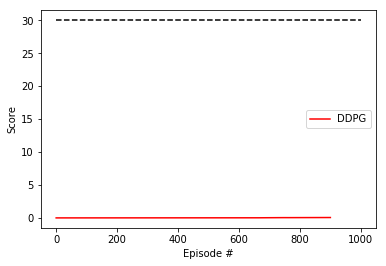

In [17]:
%load_ext autoreload
%autoreload 2

from utils.workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import numpy as np
from datetime import datetime
from utils import utils
from unity_env_decorator import UnityEnvDecorator
from agents.ddpg_agent_version_2 import DDPGAgentVersion2
from agents.agent_group import AgentGroup
from utils.utils import ScoreParcels

import pdb 

version='DDPG_version_3'
dir_logs='./logs/'
dir_checkpoints='./checkpoints/'

def ddpg(envDecorator, agentGroup, n_episode=2000, max_episode_length=2000, 
         print_every=100, size_window=100, baseline_score=0.5, save_best=True):
         

    max_score = 0.0
    scores_deque = deque(maxlen=size_window)
    scores = []
    
    
    # Declare time stamp for total execution time
    start_time_total = datetime.now()
    # Declare time stamp for execution time within 'print_every' episodes.
    start_time_window = datetime.now()
    
    
    for i_episode in range(1, n_episode+1):
        states = envDecorator.reset()
        agentGroup.reset()
        score = np.zeros(envDecorator.num_agents)
        
        for i_step in range(max_episode_length):
            # actions[0] = actions of agent_0.
            # actions[1]= actions of agent_1
            actions = agentGroup.act(states, add_noise=True)

#             pdb.set_trace()
            
            # next_states[0] = next_states of agent_0
            # next_states[1] = next_states of agent_1
            next_states, rewards, dones, _ = envDecorator.step(actions)

            agentGroup.step(states, actions, rewards, next_states, dones)
            
            score += rewards
            states = next_states
            
            if np.any(dones):
                break
                
        score_sum = np.sum(score)
        scores.append(score_sum)
        scores_deque.append(score_sum)
             
        print('\rEpisode {}\tReward:{:}\tStep:{}\tTime:{}'.format(i_episode,
                                                             score,
                                                              i_step+1,
                                                             datetime.now() - start_time_total),
                                                             end='')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score:{:.4f}\tExecution Time:{}'.format(i_episode,
                                                                 np.mean(scores_deque),
                                                                 datetime.now() - start_time_window))
                                                                 
            start_time_window = datetime.now()

        # save the best model
        if save_best is True:
            if (score_sum > baseline_score) and (max_score < score_sum):
                utils.save(agentGroup.model_dict(), dir_checkpoints, version)
                max_score = score_sum
            
           
    print('Average Score: {:.4f}\tTotal Time={}'.format(np.mean(scores_deque),
                                                        datetime.now() - start_time_total))
    
    return scores
        
                
with active_session():
    
    # Decorator of unity environmet
    envDecorator = UnityEnvDecorator(env)

    # define common parameters
    base_params = {'state_size': 24, 
                    'action_size': 2,
                    'random_seed': 0,
                    'lr_actor': 1e-3, 
                    'lr_critic': 1e-3,
                    'fc1_units': 128, 
                    'fc2_units': 128,
                    'buffer_size': int(1e6),
                    'learn_period': 20, 
                    'learn_sampling_num': 10,
                    'max_norm': 0.5,
                    'exploration_sigma': 0.4}
                    
    agent0 = DDPGAgentVersion2(**base_params, name='0')
    agent1 = DDPGAgentVersion2(**base_params, name='1')
                        
    # Composite design pattern
    agentGroup = AgentGroup([agent0, agent1])
    
    scores = ddpg(envDecorator, agentGroup, n_episode=1000, 
                    max_episode_length=20000, print_every=100)
    
    utils.save_logs(scores, dir_logs, version)
    
    path_score = utils.log_path_name(dir_logs, version)
    score_parcels = [ScoreParcels('DDPG', path_score, 'r')]
    utils.plot_scores(score_parcels, size_window=100)

    # save models in the agent. (Agent needs to return dict with model-name pair)
    utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score:-0.0100	Execution Time:0:00:19.645725
Episode 200	Average Score:0.0010	Execution Time:0:00:23.063428
Episode 300	Average Score:-0.0050	Execution Time:0:00:21.391901
Episode 400	Average Score:-0.0090	Execution Time:0:00:21.378825
Episode 500	Average Score:-0.0100	Execution Time:0:00:20.414078
Episode 600	Average Score:-0.0100	Execution Time:0:00:20.855483
Episode 700	Average Score:-0.0090	Execution Time:0:00:20.474494
Episode 800	Average Score:-0.0090	Execution Time:0:00:20.590887
Episode 900	Average Score:-0.0100	Execution Time:0:00:20.186200
Episode 1000	Average Score:-0.0090	Execution Time:0:00:22.147700
Average Score: -0.0090	Total Time=0:03:30.150324


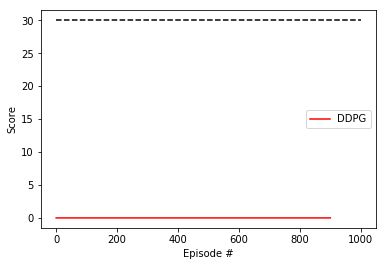

In [18]:
%load_ext autoreload
%autoreload 2

from utils.workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import numpy as np
from datetime import datetime
from utils import utils
from unity_env_decorator import UnityEnvDecorator
from agents.ddpg_agent_version_2 import DDPGAgentVersion2
from agents.agent_group import AgentGroup
from utils.utils import ScoreParcels

import pdb 

version='DDPG_version_3'
dir_logs='./logs/'
dir_checkpoints='./checkpoints/'

def ddpg(envDecorator, agentGroup, n_episode=2000, max_episode_length=2000, 
         print_every=100, size_window=100, baseline_score=0.5, save_best=True):
         

    max_score = 0.0
    scores_deque = deque(maxlen=size_window)
    scores = []
    
    
    # Declare time stamp for total execution time
    start_time_total = datetime.now()
    # Declare time stamp for execution time within 'print_every' episodes.
    start_time_window = datetime.now()
    
    
    for i_episode in range(1, n_episode+1):
        states = envDecorator.reset()
        agentGroup.reset()
        score = np.zeros(envDecorator.num_agents)
        
        for i_step in range(max_episode_length):
            # actions[0] = actions of agent_0.
            # actions[1]= actions of agent_1
            actions = agentGroup.act(states, add_noise=True)

#             pdb.set_trace()
            
            # next_states[0] = next_states of agent_0
            # next_states[1] = next_states of agent_1
            next_states, rewards, dones, _ = envDecorator.step(actions)

            agentGroup.step(states, actions, rewards, next_states, dones)
            
            score += rewards
            states = next_states
            
            if np.any(dones):
                break
                
        score_sum = np.sum(score)
        scores.append(score_sum)
        scores_deque.append(score_sum)
             
        print('\rEpisode {}\tReward:{:}\tStep:{}\tTime:{}'.format(i_episode,
                                                             score,
                                                              i_step+1,
                                                             datetime.now() - start_time_total),
                                                             end='')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score:{:.4f}\tExecution Time:{}'.format(i_episode,
                                                                 np.mean(scores_deque),
                                                                 datetime.now() - start_time_window))
                                                                 
            start_time_window = datetime.now()

        # save the best model
        if save_best is True:
            if (score_sum > baseline_score) and (max_score < score_sum):
                utils.save(agentGroup.model_dict(), dir_checkpoints, version)
                max_score = score_sum
            
           
    print('Average Score: {:.4f}\tTotal Time={}'.format(np.mean(scores_deque),
                                                        datetime.now() - start_time_total))
    
    return scores
        
                
with active_session():
    
    # Decorator of unity environmet
    envDecorator = UnityEnvDecorator(env)

    # define common parameters
    base_params = {'state_size': 24, 
                    'action_size': 2,
                    'random_seed': 0,
                    'lr_actor': 1e-3, 
                    'lr_critic': 1e-3,
                    'fc1_units': 256, 
                    'fc2_units': 128,
                    'buffer_size': int(1e6),
                    'learn_period': 20, 
                    'learn_sampling_num': 10,
                    'max_norm': 0.5,
                    'exploration_sigma': 0.4}
                    
    agent0 = DDPGAgentVersion2(**base_params, name='0')
    agent1 = DDPGAgentVersion2(**base_params, name='1')
                        
    # Composite design pattern
    agentGroup = AgentGroup([agent0, agent1])
    
    scores = ddpg(envDecorator, agentGroup, n_episode=1000, 
                    max_episode_length=20000, print_every=100)
    
    utils.save_logs(scores, dir_logs, version)
    
    path_score = utils.log_path_name(dir_logs, version)
    score_parcels = [ScoreParcels('DDPG', path_score, 'r')]
    utils.plot_scores(score_parcels, size_window=100)

    # save models in the agent. (Agent needs to return dict with model-name pair)
    utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score:-0.0080	Execution Time:0:00:20.416949
Episode 200	Average Score:-0.0090	Execution Time:0:00:21.198164
Episode 300	Average Score:-0.0080	Execution Time:0:00:19.901025
Episode 400	Average Score:0.0010	Execution Time:0:00:23.200821
Episode 500	Average Score:0.0119	Execution Time:0:00:26.625089
Episode 600	Average Score:0.0150	Execution Time:0:00:27.095307
Episode 700	Average Score:0.0570	Execution Time:0:00:37.267260
Episode 800	Average Score:0.0910	Execution Time:0:00:46.291517
Episode 900	Average Score:0.1158	Execution Time:0:00:55.456904
Episode 945	Reward:[ 0.29        0.40000001]	Step:147	Time:0:05:01.503308
Save Best at episode 945
Episode 1000	Average Score:0.1248	Execution Time:0:00:56.697191
Episode 1100	Average Score:0.1170	Execution Time:0:00:54.5564975:46.053606
Episode 1146	Reward:[ 0.39000001  0.40000001]	Step:166	Time:0:07:01.736543
Save Best at episode 1146
Epi

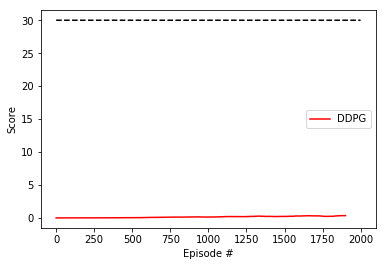

In [27]:
%load_ext autoreload
%autoreload 2

from utils.workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import numpy as np
from datetime import datetime
from utils import utils
from unity_env_decorator import UnityEnvDecorator
from agents.ddpg_agent_version_2 import DDPGAgentVersion2
from agents.agent_group import AgentGroup
from utils.utils import ScoreParcels

import pdb 

version='DDPG_version_3'
dir_logs='./logs/'
dir_checkpoints='./checkpoints/'

def ddpg(envDecorator, agentGroup, n_episode=2000, max_episode_length=2000, 
         print_every=100, size_window=100, baseline_score=0.5, save_best=True):
         

    max_score = -1.0
    scores_deque = deque(maxlen=size_window)
    scores = []
    
    
    # Declare time stamp for total execution time
    start_time_total = datetime.now()
    # Declare time stamp for execution time within 'print_every' episodes.
    start_time_window = datetime.now()
    
    
    for i_episode in range(1, n_episode+1):
        states = envDecorator.reset()
        agentGroup.reset()
        score = np.zeros(envDecorator.num_agents)
        
        for i_step in range(max_episode_length):
            # actions[0] = actions of agent_0.
            # actions[1]= actions of agent_1
            actions = agentGroup.act(states, add_noise=True)

#             pdb.set_trace()
            
            # next_states[0] = next_states of agent_0
            # next_states[1] = next_states of agent_1
            next_states, rewards, dones, _ = envDecorator.step(actions)

            agentGroup.step(states, actions, rewards, next_states, dones)
            
            score += rewards
            states = next_states
            
            if np.any(dones):
                break
                
        score_sum = np.sum(score)
        scores.append(score_sum)
        scores_deque.append(score_sum)
             
        print('\rEpisode {}\tReward:{:}\tStep:{}\tTime:{}'.format(i_episode,
                                                             score,
                                                              i_step+1,
                                                             datetime.now() - start_time_total),
                                                             end='')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score:{:.4f}\tExecution Time:{}'.format(i_episode,
                                                                 np.mean(scores_deque),
                                                                 datetime.now() - start_time_window))
                                                                 
            start_time_window = datetime.now()

        # save the best model
        if save_best is True:
            if (score_sum > baseline_score) and (max_score < score_sum):
                print('\nSave Best at episode {}'.format(i_episode))
                utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)
                max_score = score_sum
            
           
    print('Average Score: {:.4f}\tTotal Time={}'.format(np.mean(scores_deque),
                                                        datetime.now() - start_time_total))
    
    return scores
        
                
with active_session():
    
    # Decorator of unity environmet
    envDecorator = UnityEnvDecorator(env)

    # define common parameters
    base_params = {'state_size': 24, 
                    'action_size': 2,
                    'random_seed': 0,
                    'lr_actor': 1e-3, 
                    'lr_critic': 1e-3,
                    'fc1_units': 64, 
                    'fc2_units': 64,
                    'buffer_size': int(1e6),
                    'learn_period': 20, 
                    'learn_sampling_num': 10,
                    'max_norm': 0.5,
                    'exploration_sigma': 0.4}
                    
    agent0 = DDPGAgentVersion2(**base_params, name='0')
    agent1 = DDPGAgentVersion2(**base_params, name='1')
                        
    # Composite design pattern
    agentGroup = AgentGroup([agent0, agent1])
    
    scores = ddpg(envDecorator, agentGroup, n_episode=2000, 
                    max_episode_length=20000, print_every=100)
    
    utils.save_logs(scores, dir_logs, version)
    
    path_score = utils.log_path_name(dir_logs, version)
    score_parcels = [ScoreParcels('DDPG', path_score, 'r')]
    utils.plot_scores(score_parcels, size_window=100)

    # save models in the agent. (Agent needs to return dict with model-name pair)
    utils.save_agent(agentGroup.model_dicts(), dir_checkpoints, version)

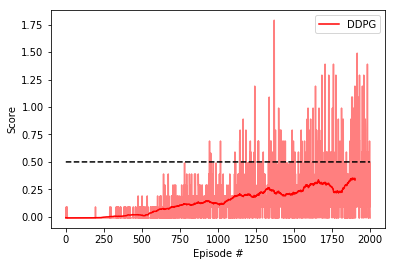

In [29]:
utils.plot_scores(score_parcels, size_window=100, show_origin=True)